In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from ipywidgets import interact
from IPython.display import clear_output

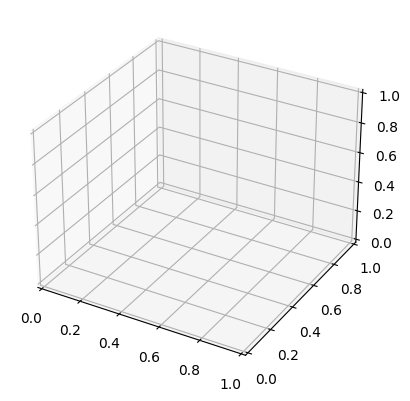

In [2]:
ax = plt.figure().add_subplot(projection='3d')

# Position nodes in a cantor set in a 2D plane (manually for 7 nodes)
## this would be a fun one to automate
nodes = {
    "location": [1/2,0],
    "children": [
            {
                "location": [1/6, 1/2],
                "children": [
                    {
                        "location": [1/18, 1]
                    },
                    {
                        "location": [4/18, 1]
                    }
                ]
            },
            {
                "location": [5/6, 1/2],
                "children": [
                    {
                        "location": [14/18, 1]
                    },
                    {
                        "location": [17/18, 1]
                    }
                ]
            }
     ]
}

def plot_nodes(node, color):
    if 'children' in node:
        for i in range(len(node['children'])):
            child = node['children'][i]
            ax.plot([node['location'][0], child['location'][0]], [node['location'][1], child['location'][1]], [node['location'][2], child['location'][2]], color)
            plot_nodes(child, color)
    

In [3]:
bed_elevations = scipy.io.loadmat('eta_avulsion.mat')['eta_save']
frames = []
for i in range(bed_elevations.shape[1]):
    bed_elevation = bed_elevations[:, i]
    frames.append(
        {
            "location": [1/2,0, bed_elevation[0]],
            "children": [
                    {
                        "location": [1/6, 1/2, bed_elevation[1]],
                        "children": [
                            {
                                "location": [1/18, 1, bed_elevation[3]]
                            },
                            {
                                "location": [4/18, 1, bed_elevation[4]]
                            }
                        ]
                    },
                    {
                        "location": [5/6, 1/2, bed_elevation[2]],
                        "children": [
                            {
                                "location": [14/18, 1, bed_elevation[5]]
                            },
                            {
                                "location": [17/18, 1, bed_elevation[6]]
                            }
                        ]
                    }
             ]
        }
    )
times = scipy.io.loadmat('eta_avulsion.mat')['t_save'][0]

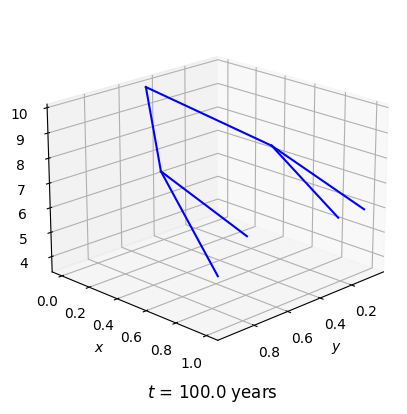

In [4]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20., azim=45, roll=0)

ax.set_xlabel('$y$')
ax.set_ylabel('$x$')
ax.set_zlabel('Bed Elevation $\eta$ (meters)')
ax.set_zlim(3.5, 10)
plot_nodes(frames[-1], 'b')
ax.set_title(f'$t$ = {np.round(times[-1],2)} years', y=-.08)
plt.show()

In [5]:
for i in list(np.linspace(0,bed_elevations.shape[1], 500)):
    i = int(i)
    if i < len(frames):
        ax = plt.figure().add_subplot(projection='3d')
        ax.view_init(elev=20., azim=45, roll=0)

        ax.set_xlabel('$y$')
        ax.set_ylabel('$x$')
        ax.set_zlabel('Bed Elevation $\eta$ (meters)')
        ax.set_zlim(3.5, 10)
        plot_nodes(frames[i], 'b')
        ax.set_title(f'$t$ = {np.round(times[i],2)} years', y=-.08)
        plt.savefig(f'frames/{str(i).zfill(5)}.png')
        print(i/len(frames), flush=True)
        plt.close()
clear_output(wait=True)

0.0
0.002
0.004
0.006
0.008
0.01
0.012
0.014
0.016
0.018
0.02
0.022
0.024
0.02605
0.02805
0.03005
0.03205
0.03405
0.03605
0.03805
0.04005
0.04205
0.04405
0.04605
0.04805
0.0501
0.0521
0.0541
0.0561
0.0581
0.0601
0.0621
0.0641
0.0661
0.0681
0.0701
0.0721
0.0741
0.07615
0.07815
0.08015
0.08215
0.08415
0.08615
0.08815
0.09015
0.09215
0.09415
0.09615
0.09815
0.1002
0.1022
0.1042
0.1062
0.1082
0.1102
0.1122
0.1142
0.1162
0.1182
0.1202
0.1222
0.1242
0.12625
0.12825
0.13025
0.13225
0.13425
0.13625
0.13825
0.14025
0.14225
0.14425
0.14625
0.14825
0.1503
0.1523
0.1543
0.1563
0.1583
0.1603
0.1623
0.1643
0.1663
0.1683
0.1703
0.1723
0.1743
0.17635
0.17835
0.18035
0.18235
0.18435
0.18635
0.18835
0.19035
0.19235
0.19435
0.19635
0.19835
0.2004
0.2024
0.2044
0.2064
0.2084
0.2104
0.2124
0.2144
0.2164
0.2184
0.2204
0.2224
0.2244
0.22645
0.22845
0.23045
0.23245
0.23445
0.23645
0.23845
0.24045
0.24245
0.24445
0.24645
0.24845
0.2505
0.2525
0.2545
0.2565
0.2585
0.2605
0.2625
0.2645
0.2665
0.2685
0.2705
0.272

In [6]:
# ffmpeg -framerate 30 -pattern_type glob -i '*.png' \ -c:v libx264 -pix_fmt yuv420p out.mp4